<h1 style="color:#1f77b4; text-align:left; font-size:40px;">
    EDA - Exploring Data
</h1>

<h3 style="color:#555; text-align:left;">
    Dataset Structure, Descriptive Statistics, Outliers Detection, Correlation, Visualization of variables and relations
</h3>


<h2 style="color:#1f77b4; border-bottom: 3px solid #1f77b4; padding-bottom:4px;">
</h2>

<!-- MODELO: Secção principal numerada -->
<!-- 
<h2 style="background-color:#1f77b4; color:white; padding:10px; border-radius:6px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Secção com linha colorida -->
<!-- 
<h2 style="color:#ff7f0e; border-bottom: 3px solid #ff7f0e; padding-bottom:4px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Subsecção -->
<!-- 
<h3 style="color:#2ca02c; margin-top:10px;">
    X.Y Nome da Subsecção
</h3>
-->

<!-- MODELO: Caixa de Nota -->
<!-- 
<div style="border-left: 5px solid #1f77b4; padding:10px; background-color:#f5f9ff; margin:15px 0;">
    <b>Nota:</b> Texto da nota.
</div>
-->

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8, 5)

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [19]:
# Adjust path if needed
DATA_PATH = "../data/interim/telco_master.csv"

df = pd.read_csv(DATA_PATH)

df.shape, df.head()


((7043, 56),
    demo_count demo_gender  demo_age demo_under_30 demo_senior_citizen demo_married demo_dependents  \
 0           1        Male        78            No                 Yes           No              No   
 1           1      Female        74            No                 Yes          Yes             Yes   
 2           1        Male        71            No                 Yes           No             Yes   
 3           1      Female        78            No                 Yes          Yes             Yes   
 4           1      Female        80            No                 Yes          Yes             Yes   
 
    demo_number_of_dependents  loc_count    loc_country   loc_state     loc_city  loc_zip_code            loc_lat_long  \
 0                          0          1  United States  California  Los Angeles         90022   34.02381, -118.156582   
 1                          1          1  United States  California  Los Angeles         90063  34.044271, -118.185237   
 

# 1: Dataset Structure

# 2: Descriptive Statistics

In [20]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
df.info()

print("\nNumeric summary:")
display(df.describe().T)

print("\nObject (categorical-like) summary:")
display(df.describe(include="object").T)

Shape: (7043, 56)

Columns:
 ['demo_count', 'demo_gender', 'demo_age', 'demo_under_30', 'demo_senior_citizen', 'demo_married', 'demo_dependents', 'demo_number_of_dependents', 'loc_count', 'loc_country', 'loc_state', 'loc_city', 'loc_zip_code', 'loc_lat_long', 'loc_latitude', 'loc_longitude', 'svc_count', 'svc_quarter', 'svc_referred_a_friend', 'svc_number_of_referrals', 'svc_tenure_in_months', 'svc_offer', 'svc_phone_service', 'svc_avg_monthly_long_distance_charges', 'svc_multiple_lines', 'svc_internet_service', 'svc_internet_type', 'svc_avg_monthly_gb_download', 'svc_online_security', 'svc_online_backup', 'svc_device_protection_plan', 'svc_premium_tech_support', 'svc_streaming_tv', 'svc_streaming_movies', 'svc_streaming_music', 'svc_unlimited_data', 'svc_contract', 'svc_paperless_billing', 'svc_payment_method', 'svc_monthly_charge', 'svc_total_charges', 'svc_total_refunds', 'svc_total_extra_data_charges', 'svc_total_long_distance_charges', 'svc_total_revenue', 'st_count', 'st_quarter'

,count,mean,std,min,25%,50%,75%,max
demo_count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
demo_age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
demo_number_of_dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
loc_count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
loc_zip_code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
loc_latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
loc_longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
svc_count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
svc_number_of_referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
svc_tenure_in_months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000



Object (categorical-like) summary:


,count,unique,top,freq
demo_gender,7043,2,Male,3555
demo_under_30,7043,2,No,5642
demo_senior_citizen,7043,2,No,5901
demo_married,7043,2,No,3641
demo_dependents,7043,2,No,5416
loc_country,7043,1,United States,7043
loc_state,7043,1,California,7043
loc_city,7043,1106,Los Angeles,293
loc_lat_long,7043,1679,"33.362575, -117.299644",43
svc_quarter,7043,1,Q3,7043



#### Numerical Features

- Dataset has **7,043 customers**.
- **Age (`demo_age`)**
  - Mean ≈ **46.5** years  
  - Range: **19** to **80**
- **Number of dependents (`demo_number_of_dependents`)**
  - Mean ≈ **0.47**
  - Median = **0** → most customers have no dependents.
- **Tenure (`svc_tenure_in_months`)**
  - Mean ≈ **32.4** months  
  - Range: **1** to **72** months.
- **Charges and revenue**
  - Average monthly charge (`svc_monthly_charge`) ≈ **$64.76**
  - Average total charges (`svc_total_charges`) ≈ **$2,280**
  - Average total revenue (`svc_total_revenue`) ≈ **$3,034**, with large variation across customers.
- **Churn-related metrics**
  - `st_churn_value` mean ≈ **0.265** → churn rate around **26.5%**
  - Satisfaction score (`st_satisfaction_score`) mean ≈ **3.24** (on a 1–5 scale).
  - `st_cltv` (customer lifetime value) ranges from about **2000** to **6500**.
- **Zipcode population (`zipcode_population`)**
  - Mean population ≈ **22,140**
  - Range: from **11** to **105,285**, indicating very different density contexts.

#### Categorical Features

- **Demographics**
  - `demo_gender` is roughly balanced, with **Male** slightly more frequent.
  - Most customers are **not under 30** and **not senior citizens**.
  - Majority are **not married** and **do not have dependents**.
- **Location**
  - All customers are in the **United States, California**.
  - There are over **1,100 cities**, with **Los Angeles** being the most common.
- **Services**
  - Most customers have **phone service** and **internet service**.
  - Among internet users, **Fiber Optic** is the most common internet type.
  - Many optional add-on services (security, backup, protection, etc.) are set to **No**.
- **Contract & Billing**
  - Most common contract is **Month-to-Month**.
  - **Paperless billing** is common.
  - **Bank Withdrawal** is the most frequent payment method.
- **Churn**
  - Most customers are labeled **No** for `st_churn_label`.
  - Among churned customers, the most frequent churn category is **Competitor**, with the top reason being **“Competitor had better devices”**.
"""


In [4]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})
missing_df[missing_df["missing_count"] > 0].head(20)


,missing_count,missing_pct
st_churn_category,5174,73.46
st_churn_reason,5174,73.46
svc_offer,3877,55.05
svc_internet_type,1526,21.67


#### **Interpreting Missing Values**


1. `st_churn_category` and `st_churn_reason`
- These fields only apply to customers who **actually churned**.
- Since the churn rate is only ~26%, the other ~74% of customers naturally have no churn reason.
- The missing values are **expected** and **not data quality issues**.

 2. `svc_offer`
- Over half of customers have no recorded offer.
- This likely means **most customers were not given a promotional offer**.
- Missing values probably represent a valid category such as “No Offer”.

3. `svc_internet_type`
- About 22% of customers have no internet type recorded.
- This usually means they **do not have internet service** at all.
- These missing values reflect actual customer behavior, not errors.

**Summary**
The missing values in these fields are **not problems**.  
They reflect **conditional fields** that only apply when the customer has churned or is using specific services.  
No major data cleaning is required for these columns, but during modeling:
- Treat missing values as meaningful categories (e.g., “No Offer”, “No Internet”, “Not Churned”).


In [5]:
# Duplicate rows check (by full row)
print("Duplicate full rows:", df.duplicated().sum())


Duplicate full rows: 0


# 3: Outliers Detection

# 4: Correlations

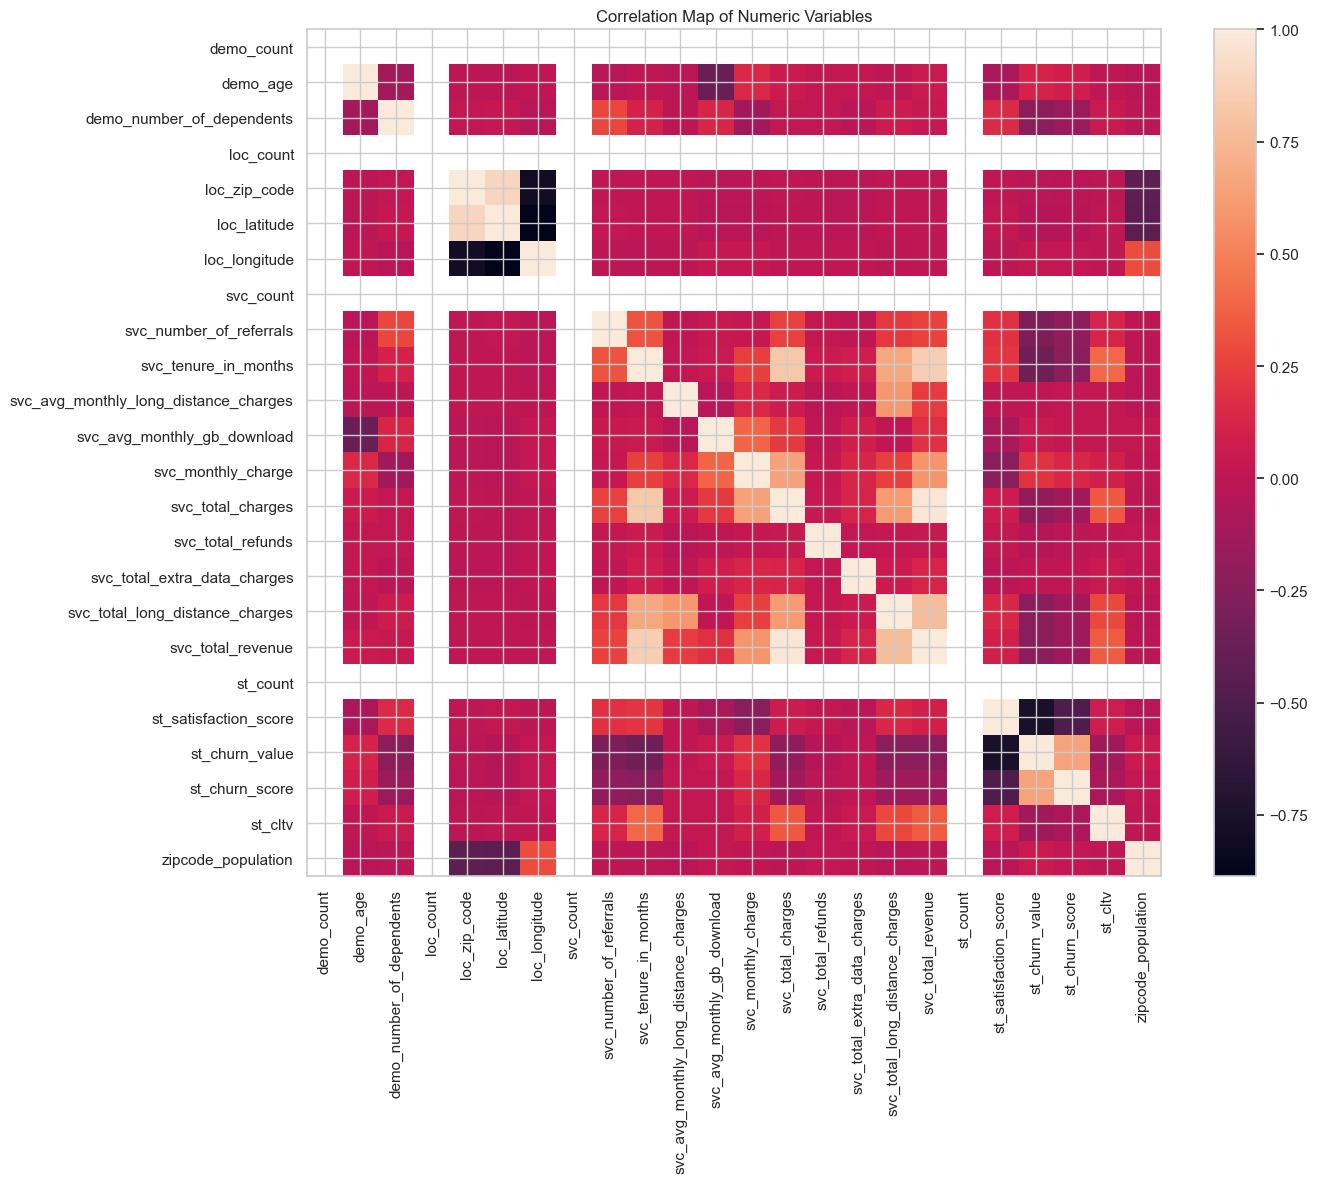

In [21]:
#Checking Correlations between Numerical Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (adjust path if needed)
df = pd.read_csv("../data/interim/telco_master.csv")

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap using matplotlib only
plt.figure(figsize=(14, 12))
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()

# Axis labels
plt.xticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns,
    rotation=90
)
plt.yticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns
)

plt.title("Correlation Map of Numeric Variables")
plt.tight_layout()
plt.show()


**Cleaning Actions Based on the Correlation Heatmap**

**1. Remove constant numeric columns**
The heatmap shows several columns with a solid color (no variation), meaning. These constant numeric fields should be removed:
- `demo_count`
- `loc_count`
- `svc_count`
- `st_count`

**2. Address numeric multicollinearity (highly correlated pairs)**
The heatmap shows some numeric variables with **very strong positive correlations**, meaning they are nearly duplicates.
- `svc_total_revenue` strongly correlated with  
  `svc_total_charges`, `svc_total_long_distance_charges`,  
  `svc_monthly_charge`, and `svc_avg_monthly_gb_download`.

**3. Geographic numeric fields are correlated**
The heatmap shows:
- `loc_latitude`
- `loc_longitude`
- `loc_zip_code`
These have strong correlations because all customers come from a limited region.

**4.Strong positive correlation between churn value and churn score.**
- `st_churn_score` and `st_churn_value` are mostly redundant.



In [26]:
#Trying to build one-hot encoding to Categorical Variables, to plug them too into the matrix
# #List Categorical Columns + Unique Values
# Load your dataset (adjust path if needed)
df = pd.read_csv("../data/interim/telco_master.csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Number of categorical columns:", len(cat_cols))
print("Categorical columns:", cat_cols)

# Display unique values for each categorical column
for col in cat_cols:
    print("\n" + "="*60)
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Unique values:")
    print(df[col].unique())


Number of categorical columns: 32
Categorical columns: ['demo_gender', 'demo_under_30', 'demo_senior_citizen', 'demo_married', 'demo_dependents', 'loc_country', 'loc_state', 'loc_city', 'loc_lat_long', 'svc_quarter', 'svc_referred_a_friend', 'svc_offer', 'svc_phone_service', 'svc_multiple_lines', 'svc_internet_service', 'svc_internet_type', 'svc_online_security', 'svc_online_backup', 'svc_device_protection_plan', 'svc_premium_tech_support', 'svc_streaming_tv', 'svc_streaming_movies', 'svc_streaming_music', 'svc_unlimited_data', 'svc_contract', 'svc_paperless_billing', 'svc_payment_method', 'st_quarter', 'st_customer_status', 'st_churn_label', 'st_churn_category', 'st_churn_reason']

Column: demo_gender
Number of unique values: 2
Unique values:
['Male' 'Female']

Column: demo_under_30
Number of unique values: 2
Unique values:
['No' 'Yes']

Column: demo_senior_citizen
Number of unique values: 2
Unique values:
['Yes' 'No']

Column: demo_married
Number of unique values: 2
Unique values:
['

The following variables have too many unique values to be one-hot-encoded:
loc_city (1106)
loc_lat_long (1679)
st_churn_reason (20)

The following ones are a constant, wouldn't bring any good information:
loc_country, loc_state, svc_quarter, st_quarter

Categorical columns: 32
Numeric columns: 24

Low-cardinality columns to encode:
['demo_gender', 'demo_under_30', 'demo_senior_citizen', 'demo_married', 'demo_dependents', 'svc_referred_a_friend', 'svc_offer', 'svc_phone_service', 'svc_multiple_lines', 'svc_internet_service', 'svc_internet_type', 'svc_online_security', 'svc_online_backup', 'svc_device_protection_plan', 'svc_premium_tech_support', 'svc_streaming_tv', 'svc_streaming_movies', 'svc_streaming_music', 'svc_unlimited_data', 'svc_contract', 'svc_paperless_billing', 'svc_payment_method', 'st_customer_status', 'st_churn_category']

Original shape: (7043, 56)
Encoded shape: (7043, 66)

Final numeric columns: 24


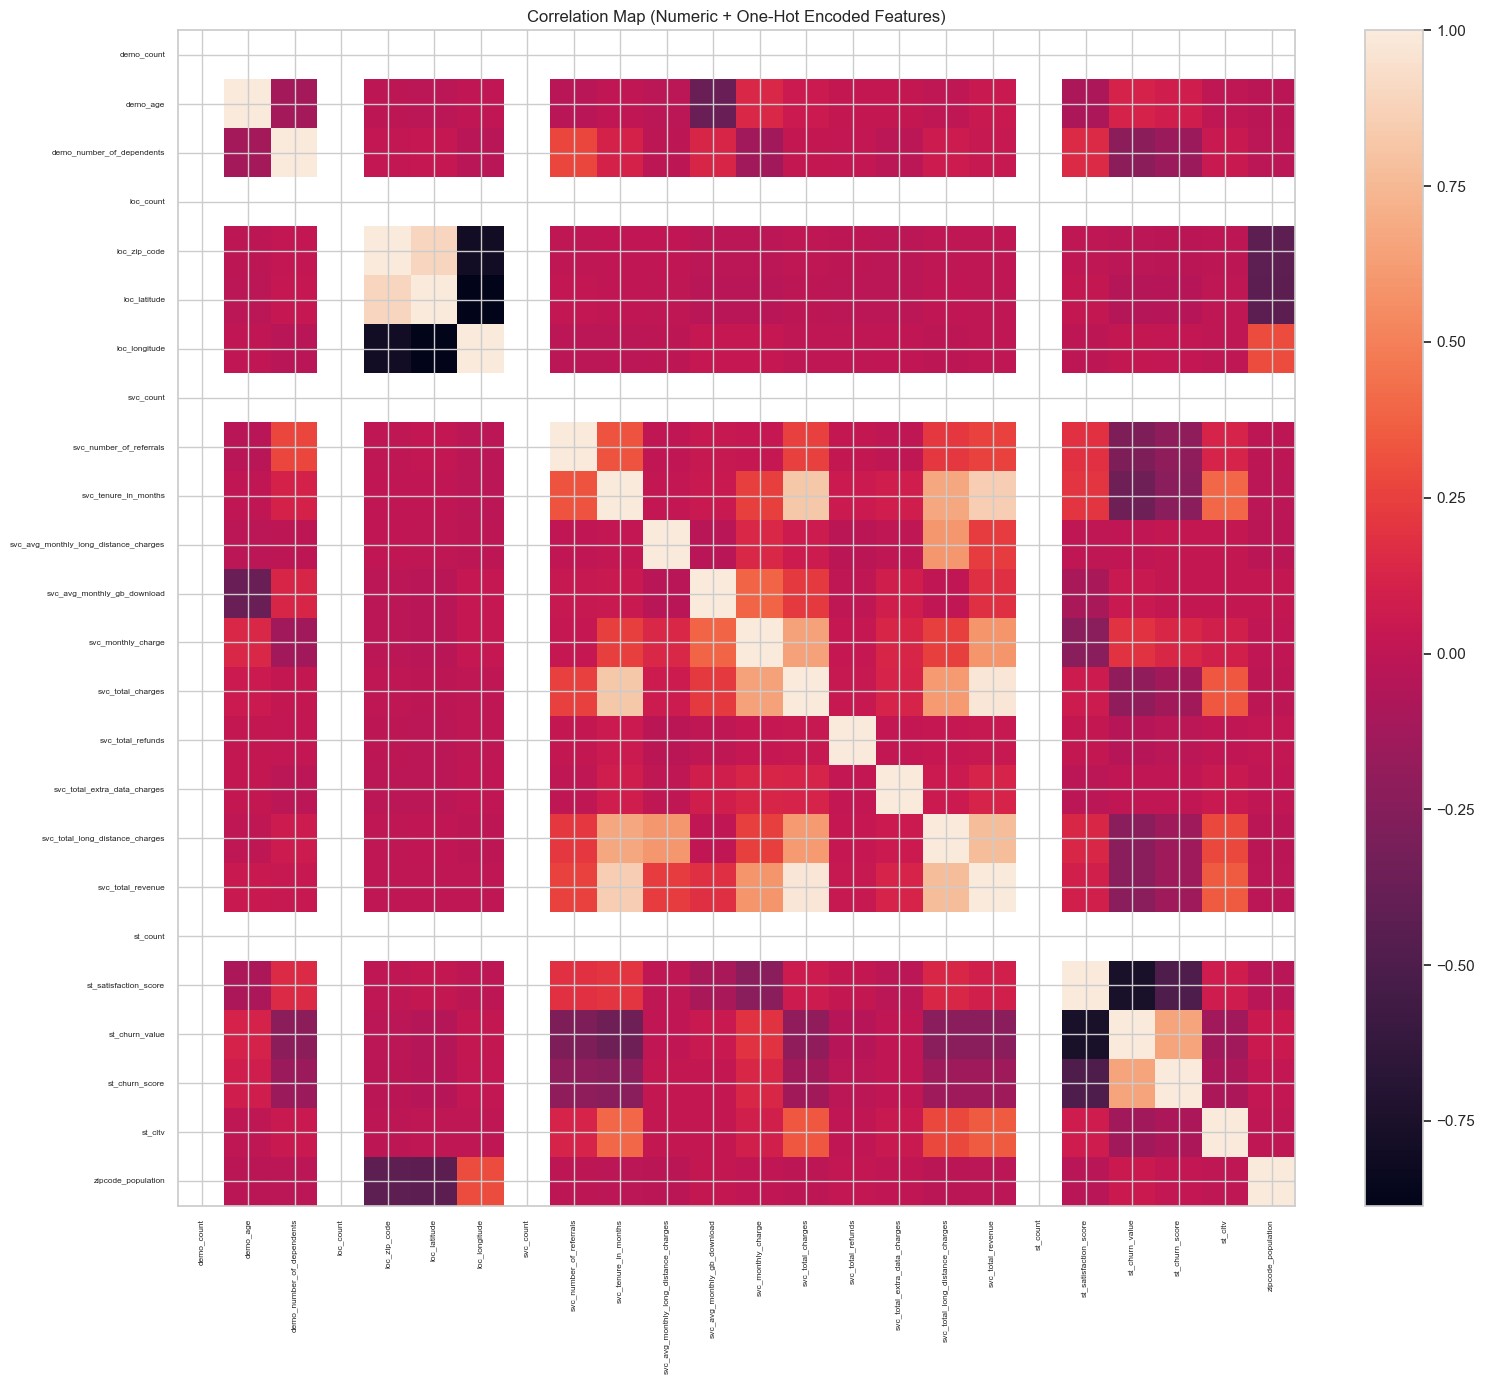

In [28]:

# 2. Identify categorical and numeric columns -------------------------
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", len(cat_cols))
print("Numeric columns:", len(num_cols))


# 3. Select low-cardinality categorical columns for one-hot encoding ---
low_cardinality_cols = [
    col for col in cat_cols
    if 1 < df[col].nunique() <= 10   # skip constant columns & avoid huge cardinality
]

# Remove churn label from encoding (optional)
if "st_churn_label" in low_cardinality_cols:
    low_cardinality_cols.remove("st_churn_label")

print("\nLow-cardinality columns to encode:")
print(low_cardinality_cols)


# 4. One-hot encode selected categorical columns ----------------------
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

print("\nOriginal shape:", df.shape)
print("Encoded shape:", df_encoded.shape)


# 5. Keep only numerical columns after encoding -----------------------
numeric_df = df_encoded.select_dtypes(include=[np.number])

print("\nFinal numeric columns:", len(numeric_df.columns))

#print heatmap
plt.figure(figsize=(16, 14))
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=6)

plt.title("Correlation Map (Numeric + One-Hot Encoded Features)")
plt.tight_layout()
plt.show()



**Variables to Remove After Reviewing the Correlation Matrix**

**1. Constant Columns (Zero Variance)**  
These contain the same value for every row and carry no signal:
- `demo_count`
- `loc_count`
- `svc_count`
- `st_count`

**2. Highly Correlated Geographic Fields**  
The variables `loc_zip_code`, `loc_latitude`, and `loc_longitude` encode similar geographic information.  
Keep **one** of the following:
- `loc_zip_code`  
or  
- (`loc_latitude`, `loc_longitude`)

**3. Highly Correlated Financial Variables**  
The following variables form a very strong correlation cluster:
- `svc_total_charges`
- `svc_total_long_distance_charges`
- `svc_monthly_charge`
- `svc_total_revenue`

**4. Redundant Churn Indicators**  
These variables encode the same churn target information:
- `st_churn_value` (keep as the target)
- `st_churn_label` (remove)
- `st_churn_score` (remove)

In [25]:
#correlations with Churn only!
target = "st_churn_value"   # or use your chosen target

corr_with_churn = corr_matrix[target].sort_values(ascending=False)
corr_with_churn.head(30)  # top 30 most correlated features


st_churn_value                           1.000000
st_churn_score                           0.660772
svc_monthly_charge                       0.193356
demo_age                                 0.115760
zipcode_population                       0.051649
svc_avg_monthly_gb_download              0.048868
loc_longitude                            0.024052
svc_avg_monthly_long_distance_charges    0.008120
svc_total_extra_data_charges             0.007139
loc_zip_code                            -0.016289
svc_total_refunds                       -0.033709
loc_latitude                            -0.041546
st_cltv                                 -0.127463
svc_total_charges                       -0.198546
demo_number_of_dependents               -0.218780
svc_total_revenue                       -0.223003
svc_total_long_distance_charges         -0.223756
svc_number_of_referrals                 -0.286540
svc_tenure_in_months                    -0.352861
st_satisfaction_score                   -0.754649


# 5: Visualization of variables and relations

<!-- MODELO: Secção principal numerada -->
<!-- 
<h2 style="background-color:#1f77b4; color:white; padding:10px; border-radius:6px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Secção com linha colorida -->
<!-- 
<h2 style="color:#ff7f0e; border-bottom: 3px solid #ff7f0e; padding-bottom:4px;">
    X. Nome da Secção
</h2>
-->

<!-- MODELO: Subsecção -->
<!-- 
<h3 style="color:#2ca02c; margin-top:10px;">
    X.Y Nome da Subsecção
</h3>
-->

<!-- MODELO: Caixa de Nota -->
<!-- 
<div style="border-left: 5px solid #1f77b4; padding:10px; background-color:#f5f9ff; margin:15px 0;">
    <b>Nota:</b> Texto da nota.
</div>
-->

In [6]:
#Univariate exploration – numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['demo_count',
 'demo_age',
 'demo_number_of_dependents',
 'loc_count',
 'loc_zip_code',
 'loc_latitude',
 'loc_longitude',
 'svc_count',
 'svc_number_of_referrals',
 'svc_tenure_in_months',
 'svc_avg_monthly_long_distance_charges',
 'svc_avg_monthly_gb_download',
 'svc_monthly_charge',
 'svc_total_charges',
 'svc_total_refunds',
 'svc_total_extra_data_charges',
 'svc_total_long_distance_charges',
 'svc_total_revenue',
 'st_count',
 'st_satisfaction_score',
 'st_churn_value',
 'st_churn_score',
 'st_cltv',
 'zipcode_population']

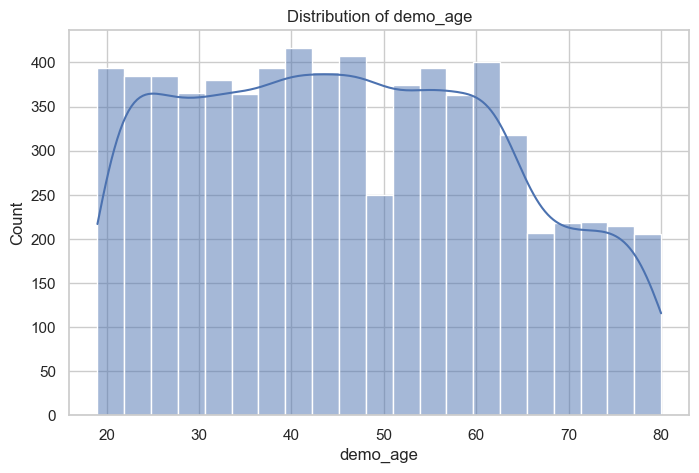

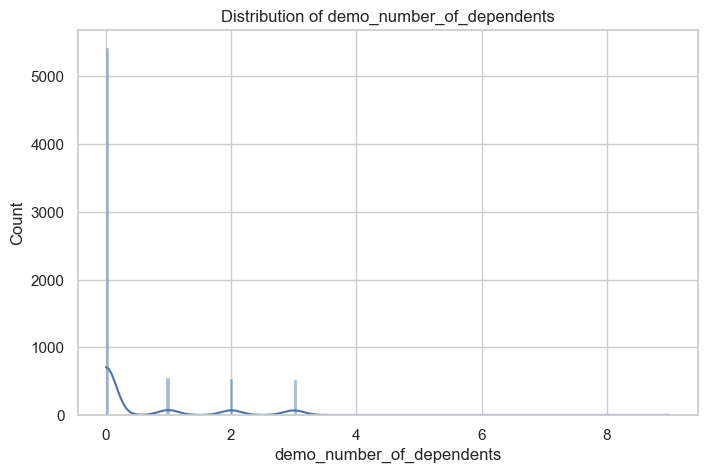

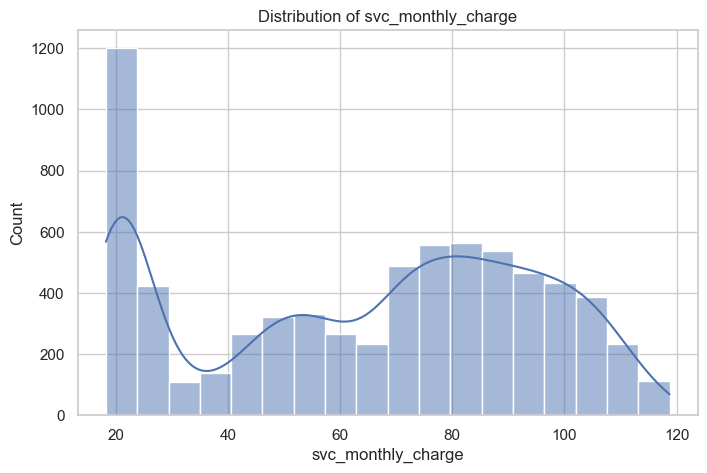

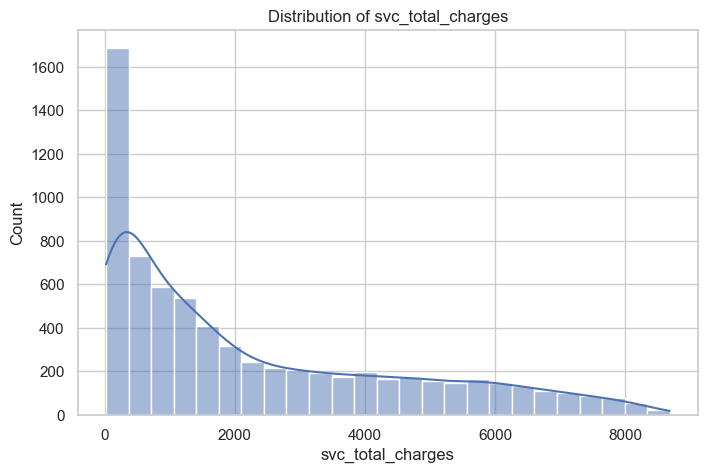

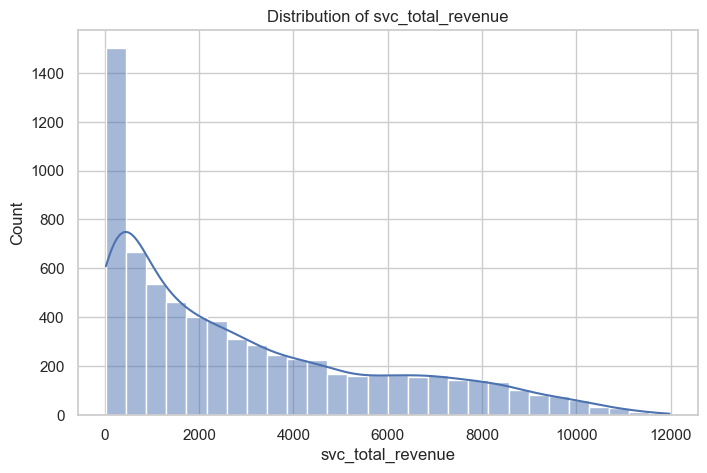

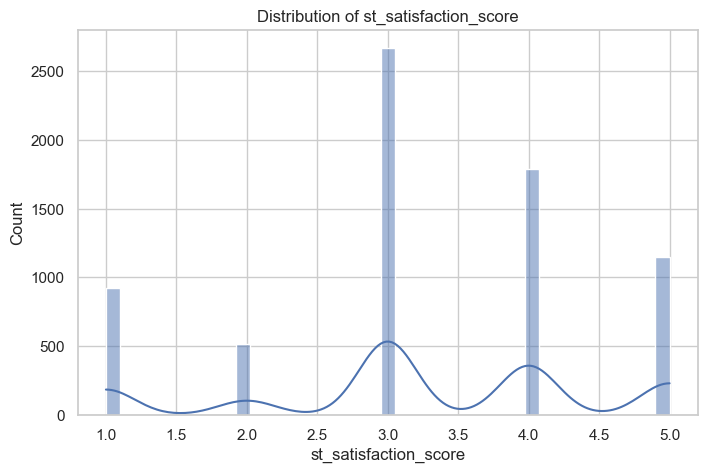

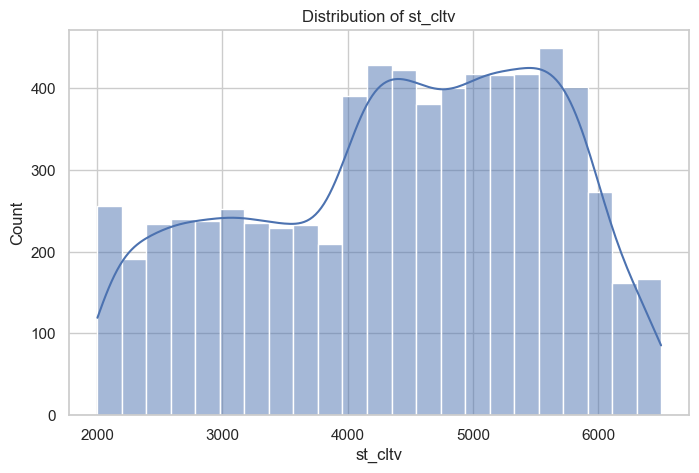

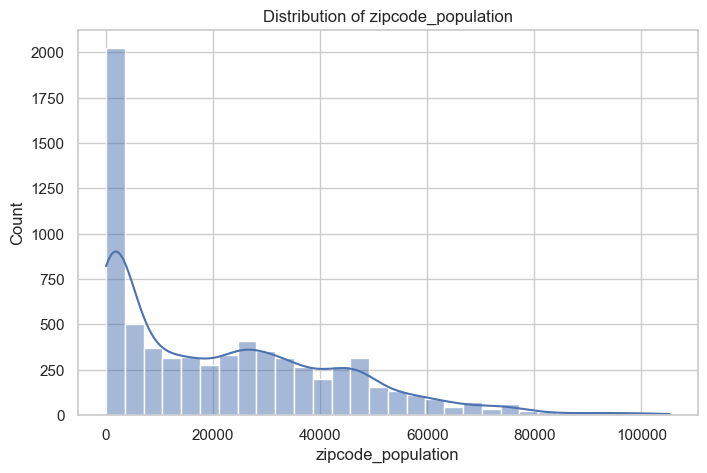

In [7]:
# Quick histograms for key numeric columns
key_numeric = [
    "demo_age",
    "demo_number_of_dependents",
    "svc_monthly_charge",
    "svc_total_charges",
    "svc_total_revenue",
    "st_satisfaction_score",
    "st_cltv",
    "zipcode_population",
]

key_numeric = [c for c in key_numeric if c in df.columns]

for col in key_numeric:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()


**Numeric Variable Distributions – Key Takeaways**

**demo_age**  
Fairly uniform between 20–60 with fewer older customers. No issues.

**demo_number_of_dependents**  
Highly skewed. Most customers have **0** dependents. A binary feature (has/doesn’t have dependents) may be better.

**svc_monthly_charge**  
Bimodal distribution. Two pricing tiers appear. Useful feature.

**svc_total_charges**  
Strong right skew driven by tenure. Highly correlated with revenue; likely removable to avoid multicollinearity.

**svc_total_revenue**  
Similar right skew. Keep **one** of the revenue/charges variables, not all.

**st_satisfaction_score**  
Discrete 1–5 with most scores at 3. Treat as ordinal.

**st_cltv**  
Moderately right-skewed but usable. No major issues.

**zipcode_population**  
Strong right skew. Consider log transform or binning.


In [8]:
#Univariate exploration – categorical features
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
cat_cols


['demo_gender',
 'demo_under_30',
 'demo_senior_citizen',
 'demo_married',
 'demo_dependents',
 'loc_country',
 'loc_state',
 'loc_city',
 'loc_lat_long',
 'svc_quarter',
 'svc_referred_a_friend',
 'svc_offer',
 'svc_phone_service',
 'svc_multiple_lines',
 'svc_internet_service',
 'svc_internet_type',
 'svc_online_security',
 'svc_online_backup',
 'svc_device_protection_plan',
 'svc_premium_tech_support',
 'svc_streaming_tv',
 'svc_streaming_movies',
 'svc_streaming_music',
 'svc_unlimited_data',
 'svc_contract',
 'svc_paperless_billing',
 'svc_payment_method',
 'st_quarter',
 'st_customer_status',
 'st_churn_label',
 'st_churn_category',
 'st_churn_reason']

In [14]:
TARGET_LABEL = "st_churn_label"   # 'Yes' / 'No'
TARGET_VALUE = "st_churn_value"   # 1 / 0

df[TARGET_LABEL].value_counts(dropna=False), df[TARGET_VALUE].value_counts(dropna=False)


(st_churn_label
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 st_churn_value
 0    5174
 1    1869
 Name: count, dtype: int64)

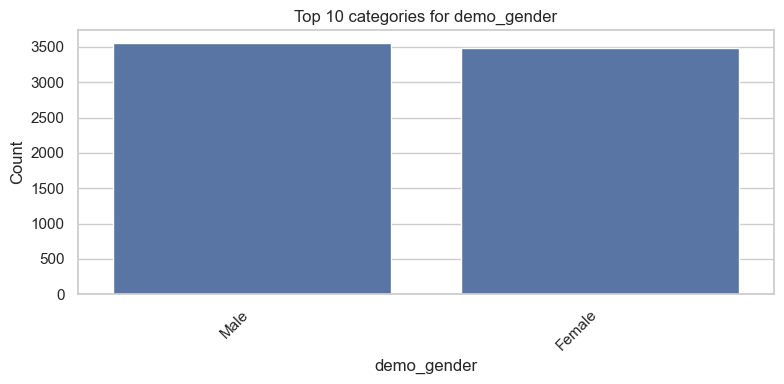

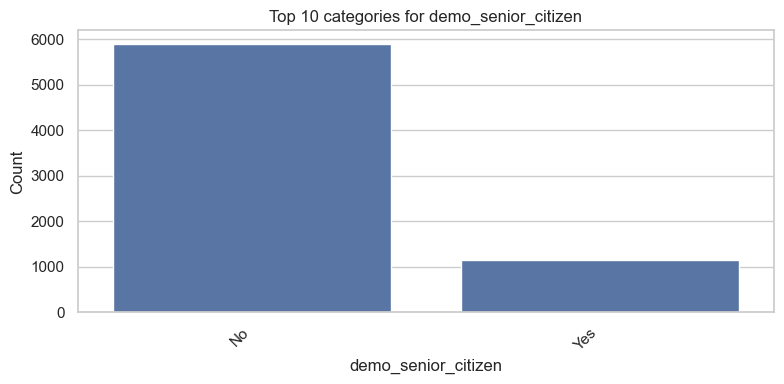

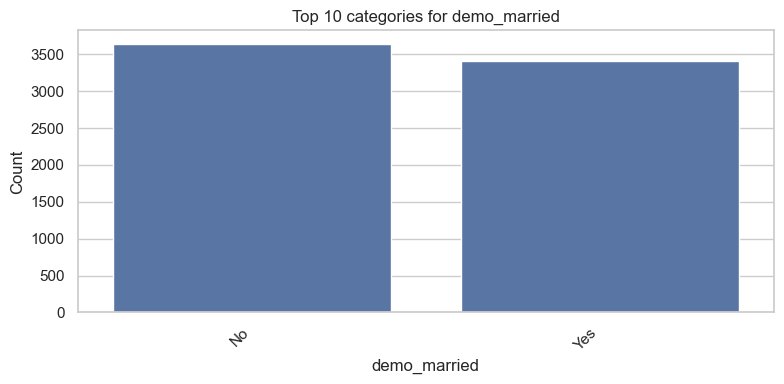

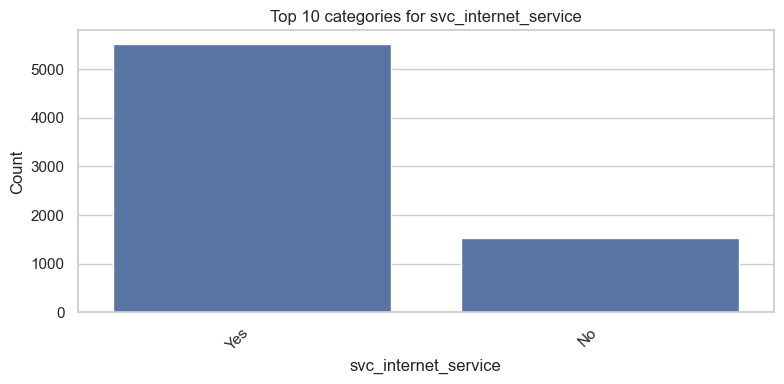

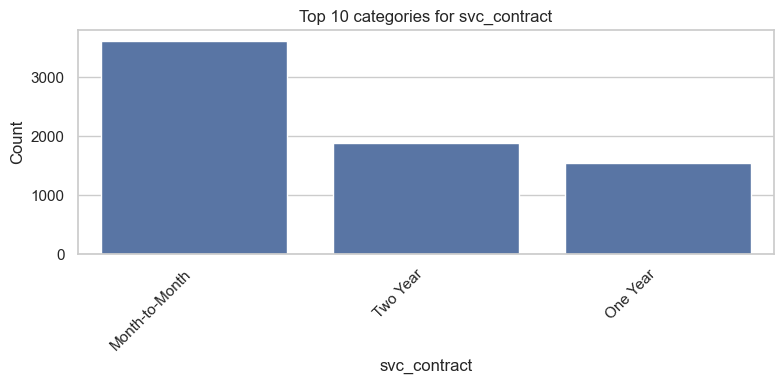

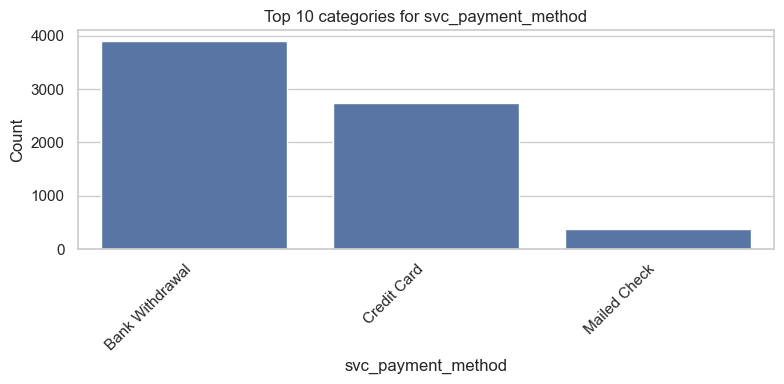

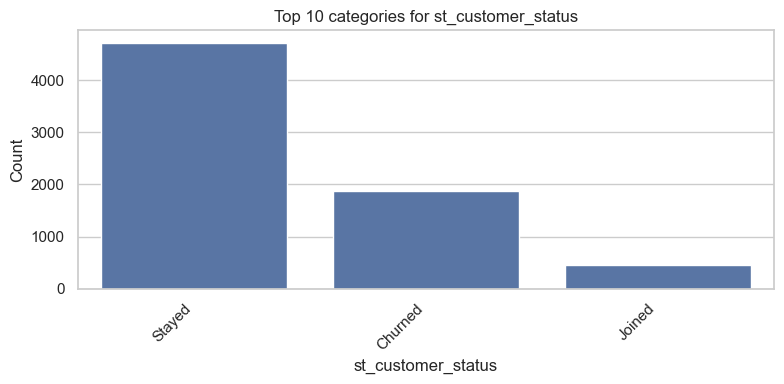

In [9]:
def plot_top_categories(column, top_n=10):
    plt.figure(figsize=(8, 4))
    vc = df[column].value_counts().head(top_n)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"Top {top_n} categories for {column}")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for col in ["demo_gender", "demo_senior_citizen", "demo_married",
            "svc_internet_service", "svc_contract", "svc_payment_method",
            "st_customer_status"]:
    if col in df.columns:
        plot_top_categories(col)


**Univariate Exploration – Categorical Features**

**demo_gender**  
Gender is evenly split between Male and Female, showing no demographic imbalance.

**demo_senior_citizen**  
Only a small proportion of customers are senior citizens. Most are below senior age.

**demo_married**  
Marriage status is fairly balanced, with a slight majority of non-married customers.

**svc_internet_service**  
Most customers have internet service. A smaller portion does not — this may be an important driver of churn or value.

**svc_contract**  
Month-to-Month is by far the most common contract type, followed by Two Year and One Year.  
This distribution may explain churn behaviors since Month-to-Month contracts usually have higher churn risk.

**svc_payment_method**  
Bank Withdrawal and Credit Card are the dominant payment methods, with Mailed Check being much less common.

**st_customer_status**  
Most customers stayed, a smaller group churned, and a very small segment recently joined.  
This aligns with the churn rate previously observed in the numeric analysis.


,count,churn_rate
demo_gender,,
Female,3488,0.269209
Male,3555,0.261603


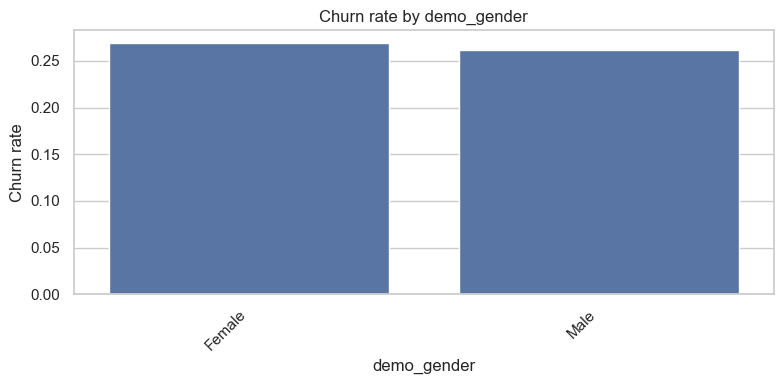

,count,churn_rate
demo_senior_citizen,,
Yes,1142,0.416813
No,5901,0.236062


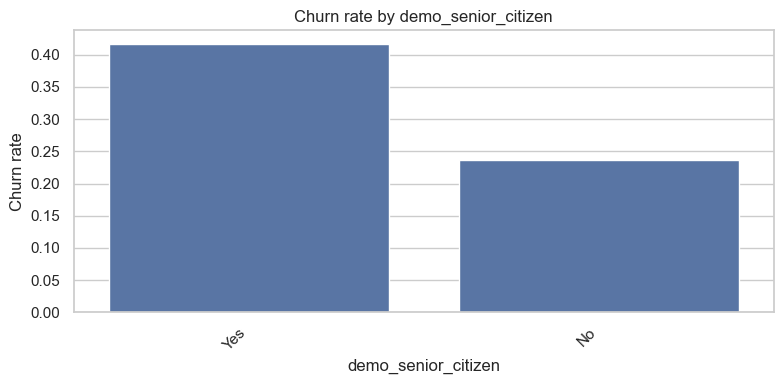

,count,churn_rate
demo_married,,
No,3641,0.329580
Yes,3402,0.196649


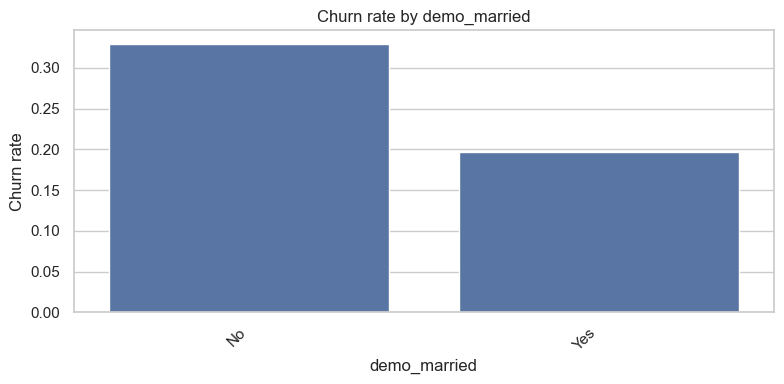

,count,churn_rate
demo_dependents,,
No,5416,0.325517
Yes,1627,0.065151


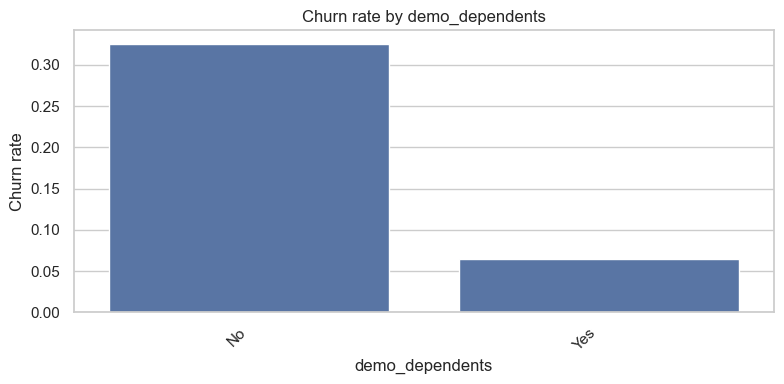

,count,churn_rate
svc_internet_service,,
Yes,5517,0.318289
No,1526,0.074050


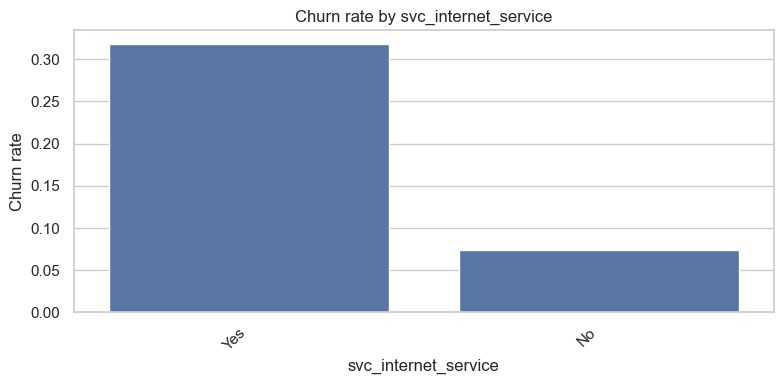

,count,churn_rate
svc_online_security,,
No,5024,0.313296
Yes,2019,0.146112


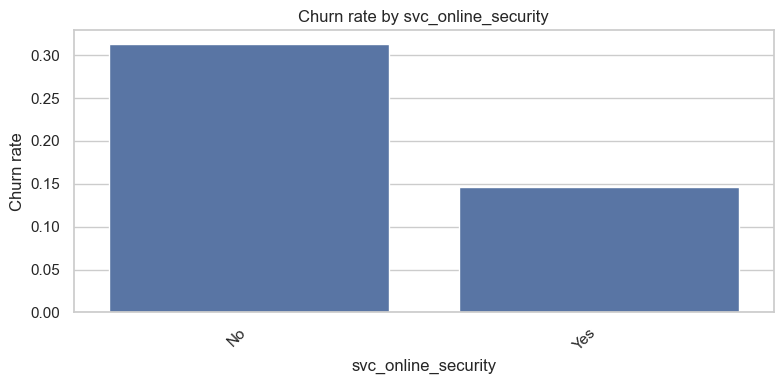

,count,churn_rate
svc_contract,,
Month-to-Month,3610,0.458449
One Year,1550,0.107097
Two Year,1883,0.025491


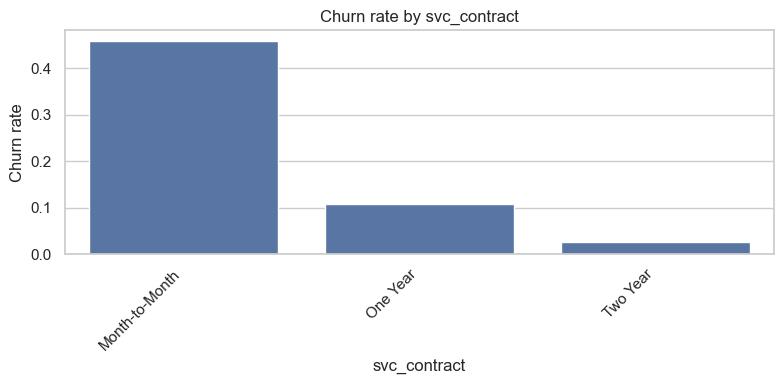

,count,churn_rate
svc_paperless_billing,,
Yes,4171,0.335651
No,2872,0.163301


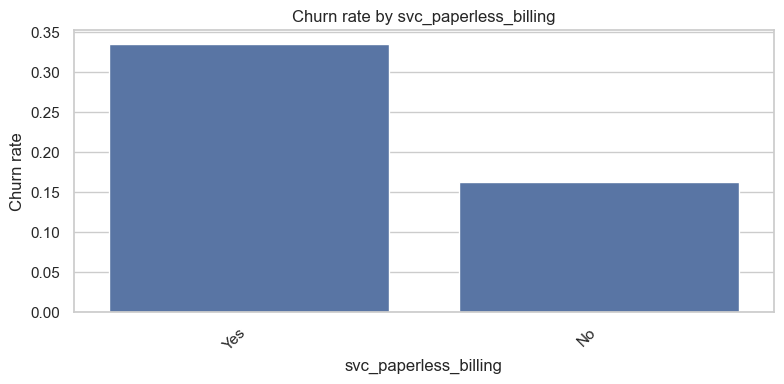

,count,churn_rate
svc_payment_method,,
Mailed Check,385,0.368831
Bank Withdrawal,3909,0.339985
Credit Card,2749,0.144780


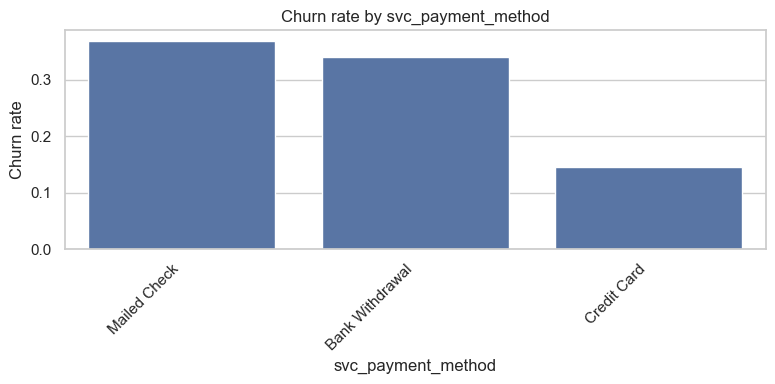

In [15]:
#Churn vs categorical features

TARGET_VALUE = "st_churn_value"   # 1 / 0

def churn_rate_by_category(col, normalize=True, sort_by_churn=True):
    temp = (df.groupby(col)[TARGET_VALUE]
              .agg(["count", "mean"])
              .rename(columns={"mean": "churn_rate"})
              .sort_values("churn_rate", ascending=False))
    display(temp)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=temp.index,
        y="churn_rate",
        data=temp.reset_index()
    )
    plt.ylabel("Churn rate")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Churn rate by {col}")
    plt.tight_layout()
    plt.show()

cat_for_churn = [
    "demo_gender",
    "demo_senior_citizen",
    "demo_married",
    "demo_dependents",
    "svc_internet_service",
    "svc_online_security",
    "svc_tech_support",
    "svc_contract",
    "svc_paperless_billing",
    "svc_payment_method",
]

for col in cat_for_churn:
    if col in df.columns:
        churn_rate_by_category(col)


**Churn vs Categorical Features – Key Takeaways**

**demo_gender**  
Churn rates are similar for Male (26.2%) and Female (26.9%).  
→ Gender is *not* a strong predictor of churn.

**demo_senior_citizen**  
Senior citizens churn much more (41.7%) than non-seniors (23.6%).  
→ Strong churn driver.

**demo_married**  
Married customers churn less (19.7%) than non-married customers (32.9%).  
→ Being married appears to reduce churn.

**demo_dependents**  
Customers with dependents churn dramatically less (6.5%) than those without (32.6%).  
→ One of the strongest churn predictors.

**svc_internet_service**  
Internet customers churn more (31.8%) than those without internet (7.4%).  
→ Internet service customers contribute the majority of churn.

**svc_online_security**  
Customers *without* online security churn more (31.3%) than those with it (14.6%).  
→ Value-added security reduces churn.

**svc_contract**  
Churn rate by contract:  
- Month-to-Month: **45.8%**  
- One Year: **10.7%**  
- Two Year: **2.5%**  
→ Contract type is one of the strongest churn predictors.

**svc_paperless_billing**  
Paperless billing customers churn more (33.6%) vs non-paperless customers (16.3%).  
Likely correlated with Month-to-Month contracts.

**svc_payment_method**  
Churn is highest for:  
- Mailed Check: **36.9%**  
- Bank Withdrawal: **34.0%**  
Lowest for:  
- Credit Card: **14.5%**  
→ Payment method influences churn risk.



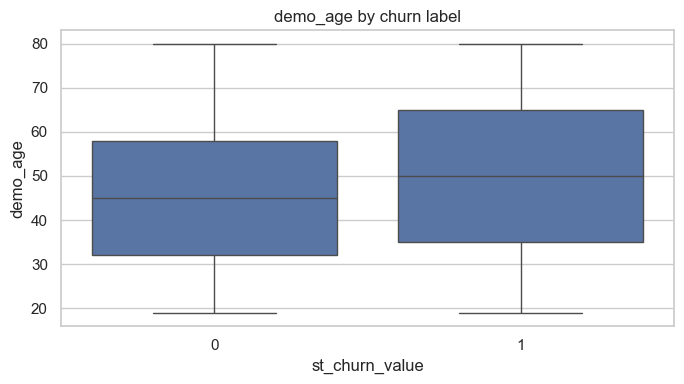


demo_age by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,45.344414,16.276025,19.0,32.0,45.0,58.0,80.0
1,1869.0,49.735688,17.604893,19.0,35.0,50.0,65.0,80.0


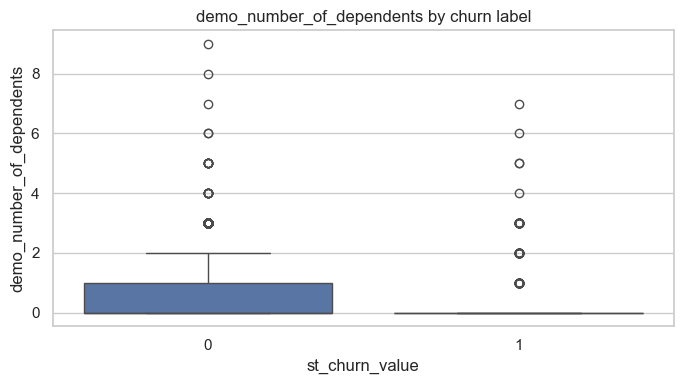


demo_number_of_dependents by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,0.595284,1.045137,0.0,0.0,0.0,1.0,9.0
1,1869.0,0.118245,0.549902,0.0,0.0,0.0,0.0,7.0


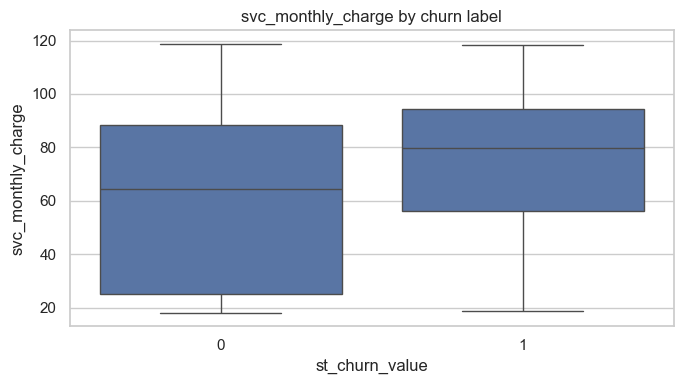


svc_monthly_charge by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


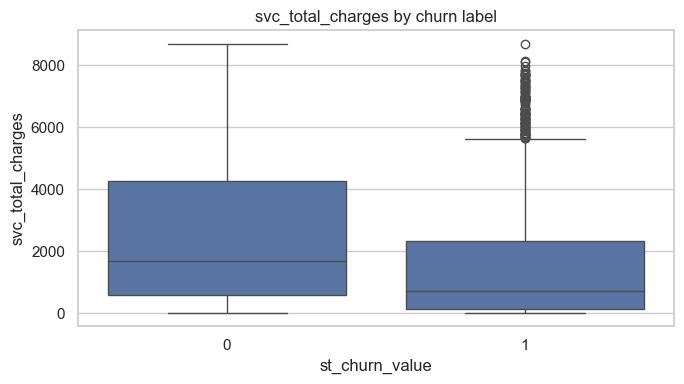


svc_total_charges by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,2550.792103,2329.091754,18.80,574.3875,1679.525,4262.85,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.30,8684.80


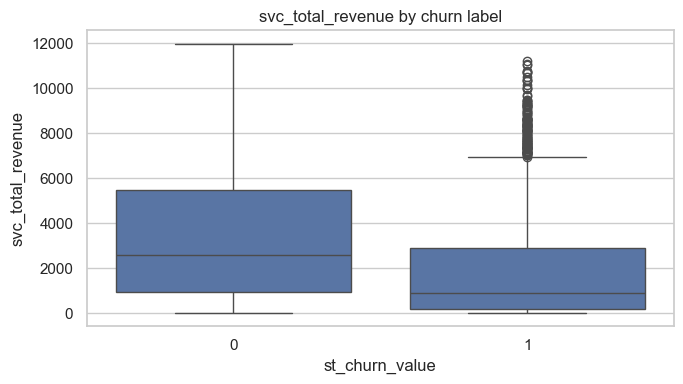


svc_total_revenue by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,3418.374927,2910.764954,21.36,938.575,2579.325,5463.415,11979.34
1,1869.0,1971.353569,2438.441813,21.61,175.850,893.550,2888.760,11195.44


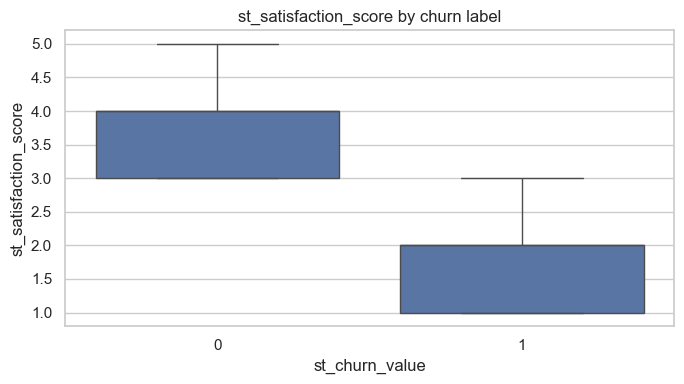


st_satisfaction_score by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,3.789911,0.781162,3.0,3.0,4.0,4.0,5.0
1,1869.0,1.736223,0.808466,1.0,1.0,2.0,2.0,3.0


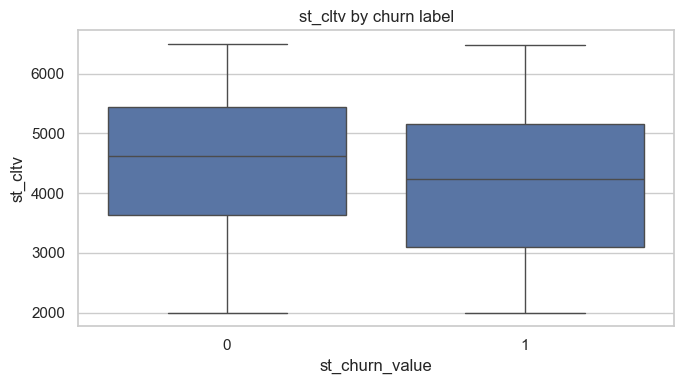


st_cltv by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,4490.921337,1167.703198,2003.0,3643.75,4620.0,5434.75,6500.0
1,1869.0,4149.414660,1189.370707,2003.0,3101.00,4238.0,5166.00,6484.0


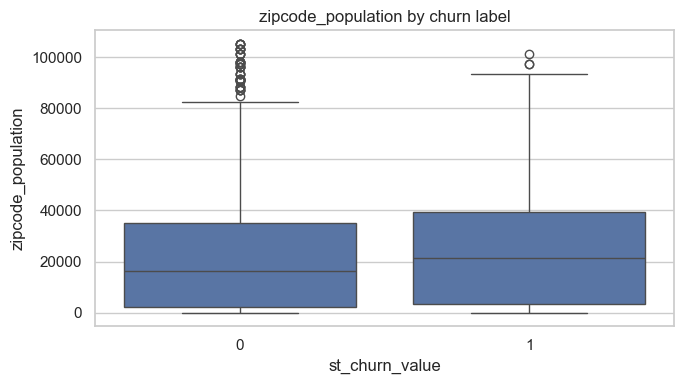


zipcode_population by churn value:


,count,mean,std,min,25%,50%,75%,max
st_churn_value,,,,,,,,
0,5174.0,21483.028991,21029.211290,11.0,2156.0,16377.5,34946.0,105285.0
1,1869.0,23957.214553,21390.485077,11.0,3193.0,21349.0,39458.0,101215.0


In [16]:
#Churn vs numeric features

TARGET_LABEL = "st_churn_value"   # 1 / 0

num_for_churn = [
    "demo_age",
    "demo_number_of_dependents",
    "svc_monthly_charge",
    "svc_total_charges",
    "svc_total_revenue",
    "st_satisfaction_score",
    "st_cltv",
    "zipcode_population",
]

num_for_churn = [c for c in num_for_churn if c in df.columns]

for col in num_for_churn:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=TARGET_LABEL, y=col, data=df)
    plt.title(f"{col} by churn label")
    plt.tight_layout()
    plt.show()

    print(f"\n{col} by churn value:")
    display(df.groupby(TARGET_LABEL)[col].describe())


**Churn vs Numeric Features – Key Takeaways**

**demo_age**  
Churners are slightly older on average (≈50) than non-churners (≈45).  
→ Mild predictive value.

**demo_number_of_dependents**  
Non-churners have more dependents on average.  
→ Consistent with the categorical pattern that dependents reduce churn.

**svc_monthly_charge**  
Churners pay more per month (≈\$74) than non-churners (≈\$61).  
→ Higher pricing correlates with higher churn.

**svc_total_charges / svc_total_revenue**  
Non-churners have significantly higher totals (they stay longer).  
→ Not useful for predicting churn retroactively; reflects tenure.

**st_satisfaction_score**  
Huge difference:  
- Non-churners: **3.79**  
- Churners: **1.74**  
→ Top predictor (satisfaction strongly tied to churn).

**st_cltv**  
Non-churners have higher CLTV.  
→ Churners tend to be lower-value customers.

**zipcode_population**  
Churners live in slightly more densely populated ZIPs.  
→ Weak-to-moderate relationship.

### Major Conclusion after EDA - Cleaning of Variables:

Columns to remove:

- demo_count
- loc_count
- svc_count
- st_count
- loc_country
- loc_state
- svc_quarter
- st_quarter
- st_churn_label
- st_churn_score
- loc_city
- loc_lat_long
- loc_latitude
- loc_longitude
- svc_total_charges
- svc_total_long_distance_charges
- svc_monthly_charge


### ** Major Conclusions from EDA - Churn Predictors**

1. **Contract type (very strong)**  
   Month-to-month contracts show massive churn, while long-term contracts are highly stable.

2. **Satisfaction score (very strong)**  
   Churners have dramatically lower satisfaction (1.7 vs. 3.8).

3. **Online security (strong)**  
   Customers without online security churn far more.

4. **Having dependents (strong)**  
   Dependents reduce churn dramatically (≈33% → 6%).

5. **Senior citizen status (medium-strong)**  
   Senior customers churn significantly more often.

6. **Monthly charges (medium-strong)**  
   Higher monthly charges correlate with higher churn.

7. **Payment method (medium)**  
   Credit card users churn far less than mailed check or bank withdrawal users.
